In [1]:
import pprint
import sys
import matplotlib.pyplot as plt
import numpy as np
from spdm.logger import logger
from spdm import open_entry

In [2]:
from fytok.modules.transport.Equilibrium import Equilibrium
from fytok.modules.device.PFActive import PFActive
from fytok.modules.device.Magnetics import Magnetics
from fytok.modules.device.Wall import Wall


In [3]:
entry = open_entry("file+mdsplus[EAST]:///home/salmon/workspace/data/~t/?tree_name=efit_east#38300",
                       mapping_path="/home/salmon/workspace/fytok_data/mapping")

2022-11-30 11:39:11,452 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/sp_export.py:101:sp_find_module_by_name: Load module spdm.plugins.data.db.PluginMDSplus#MDSplusFile
2022-11-30 11:39:11,453 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:64:__init__: Open MDSplusFile: /home/salmon/workspace/data/~t/ mode='r'
2022-11-30 11:39:11,454 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/sp_export.py:101:sp_find_module_by_name: Load module spdm.plugins.data.file.PluginXML
2022-11-30 11:39:11,455 DEBUG [spd] /home/salmon/workspace/SpDB/python/spdm/data/File.py:64:__init__: Open XMLFile: [PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/static/config.xml'), PosixPath('/home/salmon/workspace/fytok_data/mapping/EAST/imas/3/dynamic/config.xml')] mode='r'


In [4]:
pf_active=PFActive(entry.get("pf_active"))
magnetics=Magnetics(entry.get("magnetics"))
wall=Wall(entry.get("wall"))



In [5]:
time_slice = 50

desc = entry.get(["equilibrium", "time_slice", time_slice]).dump()

desc["time"] = 1.2345

desc["vacuum_toroidal_field"] = {
    "b0": entry.get(["equilibrium", "vacuum_toroidal_field", "b0"])[time_slice],
    "r0": entry.get(["equilibrium", "vacuum_toroidal_field", "r0"])[time_slice],
}

eq = Equilibrium(desc)

2022-11-30 11:39:13,719 ERROR [spd] /home/salmon/workspace/SpDB/python/spdm/plugins/data/db/PluginMDSplus.py:129:fetch: No data! tree_name=efit_east shot=38300 tdi="DATA(\BETAN)[50]" 
 %TREE-E-NODATA, No data available for this node


In [6]:
eq.profiles_1d.q(np.linspace(0,1,128))

/fuyun/software/SciPy-bundle/2020.11-foss-2020b/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array([0.6076558 , 2.00396297, 2.00951332, 2.01375034, 2.01876026,
       2.0226213 , 2.02723489, 2.03195538, 2.03668388, 2.0414765 ,
       2.04645637, 2.05122274, 2.05666071, 2.06161914, 2.06688796,
       2.07245741, 2.07767874, 2.08330007, 2.08912063, 2.09465466,
       2.10056663, 2.10662237, 2.11261184, 2.11872511, 2.1251251 ,
       2.13148787, 2.13792285, 2.1445273 , 2.15137196, 2.15815497,
       2.16505978, 2.17219674, 2.17948444, 2.18680894, 2.19422082,
       2.20187611, 2.20967486, 2.21753249, 2.22554271, 2.23370004,
       2.24210352, 2.25056092, 2.25916121, 2.26795454, 2.27692327,
       2.28610451, 2.29533987, 2.30478662, 2.31446497, 2.32430641,
       2.33433772, 2.34452491, 2.35491299, 2.36556187, 2.37638305,
       2.38740238, 2.39866706, 2.41011384, 2.42184589, 2.43381686,
       2.44596871, 2.4584182 , 2.47111232, 2.48408214, 2.49735375,
       2.51084783, 2.5246385 , 2.53880239, 2.55320883, 2.5679432 ,
       2.58303679, 2.59842408, 2.61420006, 2.63035908, 2.64685

(0.41546950000000005, 3.4470804999999998, -2.28107, 2.2810699999999997)

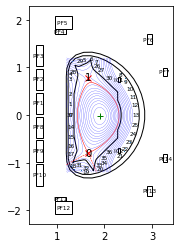

In [8]:
wall.plot()
magnetics.plot()
pf_active.plot()
eq.plot(contours=np.linspace(0,2,20))

plt.axis('scaled')

In [9]:
eq.global_quantities.magnetic_axis.r

1.908655130175345

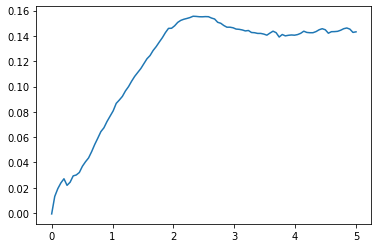

In [10]:
time=np.linspace(0,5,100)
bp=magnetics.bpol_probe[2].field(time)
plt.plot(time,bp)

In [14]:
magnetics.bpol_probe[2].toroidal_angle


90.0

In [ ]:
time_slice = 50

desc = entry.get(["equilibrium", "time_slice", time_slice]).dump()

desc["time"] = 1.2345

desc["vacuum_toroidal_field"] = {
    "b0": entry.get(["equilibrium", "vacuum_toroidal_field", "b0"])[time_slice],
    "r0": entry.get(["equilibrium", "vacuum_toroidal_field", "r0"])[time_slice],
}

eq = Equilibrium(desc)


print(eq.global_quantities.ip)


2022-11-22 11:42:08,812 ERROR [spd] /home/salmon/workspace/SpDB/python/spdm/plugins/data/db/PluginMDSplus.py:127:fetch: No data! tree_name=efit_east shot=38300 tdi="DATA(\BETAN)[50]" 
 %TREE-E-NODATA, No data available for this node
399225.10782877606


(1.13, 2.670000000000001, -1.3200000000000003, 1.3200000000000003)

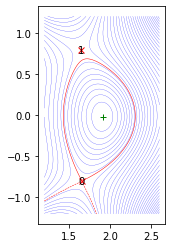

In [ ]:
eq.plot(contour=np.linspace(-1,5,50))
plt.axis('scaled')

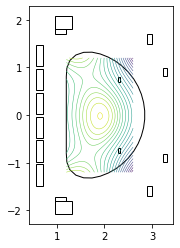

In [10]:
plt.gca().add_patch(plt.Polygon(np.array([entry.get("wall.description_2d.vessel.annular.outline_outer.r"),
                                          entry.get("wall.description_2d.vessel.annular.outline_outer.z")]).transpose([1, 0]),
                                fill=False, closed=True))


for coil in entry.get("pf_active.coil"):
    rect = coil.get(["element", 0, "geometry", "rectangle"]).dump_named()
    plt.gca().add_patch(plt.Rectangle((rect.r-rect.width/2.0, rect.z -
                                       rect.height/2.0), rect.width, rect.height, fill=False))
plt.axis('scaled')

time_slice=50

dim1 = entry.get(["equilibrium", "time_slice", time_slice, "profiles_2d", "grid", "dim1"])
dim2 = entry.get(["equilibrium", "time_slice", time_slice, "profiles_2d", "grid", "dim2"])

plt.contour(dim1, dim2, entry.get(["equilibrium", "time_slice", time_slice, "profiles_2d", "psi"]).T, levels=20, linewidths=0.5,)


efit_time=entry.get(["equilibrium", "time"])

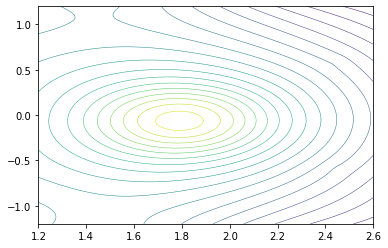

In [ ]:
dim1 = entry.get(["equilibrium", "time_slice", 0, "profiles_2d", "grid", "dim1"])
dim2 = entry.get(["equilibrium", "time_slice", 0, "profiles_2d", "grid", "dim2"])

plt.contour(dim1, dim2, entry.get(["equilibrium", "time_slice", 0, "profiles_2d", "psi"]).T, levels=20, linewidths=0.5,)


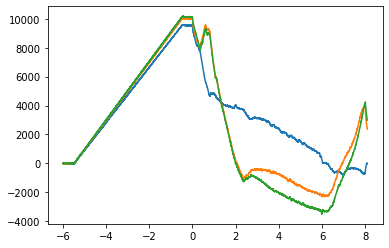

In [ ]:
current = [coil.get("current.data") for coil in entry.get("pf_active.coil")]

pcs_time=entry.get("pf_active.time")
plt.plot(pcs_time,current[1])
plt.plot(pcs_time,current[2])
plt.plot(pcs_time,current[3])

In [ ]:
from typing import Sequence


def as_path(*args, delimiter='.'):

    def _convert(v):
        if isinstance(v, str):
            return v.split(delimiter)
        elif not isinstance(v, Sequence):
            return [v]
        else:
            return v

    res = sum([_convert(v) for v in args], [])

    return res


In [ ]:
as_path("equilibrium.time_slice.0.profiles_1d.f")

['equilibrium', 'time_slice', '0', 'profiles_1d', 'f']

In [ ]:
list(5)

TypeError: 'int' object is not iterable

In [ ]:
"-5".isdigit()

False

In [ ]:
from fytok.fymodules.equilibrium import ATEC
from fytok.fymodules. import XiaoTaoTrans

prev_profile = init_profile

while True:
    next_eq = ATEC(prev_profile, prev_eq, wall)

    next_core_source = FooSouce(next_eq, ...)

    next_core_transport = FooTransport(next_eq, ...)

    next_profile = XiaoTaoTrans(next_eq, next_core_source, next_core_transport)

    if residual(prev_profile, next_profile) < 1.0e-5:
        break
    else:
        prev_eq = next_eq
        prev_profile = next_profile

res = {
    "equilibrium": next_eq,
    "core_profiles": next_profile
}
